<a href="https://colab.research.google.com/github/FredLongo/MLDL_Project/blob/main/Kaggle_Code_RNN_Test_1_NK_2_23_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Code obtained from Kaggle to test RNNs
#Source: https://www.kaggle.com/code/rafetcan/recurrent-neural-n-rnn-tutorial-for-beginners
#Code has a prediction for the closing price, but only usings previous closing prices to predict.

import pandas as pd

#Load Data
data = pd.read_csv("/content/drive/MyDrive/adm.us.txt")

data.head()

training_size = int(len(data)*0.80)
data_len = len(data)

train, test = data[0:training_size],data[training_size:data_len]

import numpy as np

#Normalize Data
# the part of data that we will use as training.
train = train.loc[:, ["Close"]].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train)
print(y_train)

[[0.01679597 0.01722658 0.01679597 ... 0.03226683 0.03226683 0.03357657]
 [0.01722658 0.01679597 0.01679597 ... 0.03226683 0.03357657 0.03510418]
 [0.01679597 0.01679597 0.01657042 ... 0.03357657 0.03510418 0.03314597]
 ...
 [0.65382811 0.66313216 0.66602846 ... 0.57926762 0.58175382 0.59254446]
 [0.66313216 0.66602846 0.6594413  ... 0.58175382 0.59254446 0.60625703]
 [0.66602846 0.6594413  0.66274769 ... 0.59254446 0.60625703 0.61217779]]
[0.03510418 0.03314597 0.03270512 ... 0.60625703 0.61217779 0.60692344]


In [36]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)

X_train -->  (6940, 40, 1)
y_train shape -->  (6940,)


In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [38]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [39]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [40]:
epochs = 100
batch_size = 20
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
347/347 [==============================] - 18s 38ms/step - loss: 0.1379
Epoch 2/100
347/347 [==============================] - 13s 37ms/step - loss: 0.0214
Epoch 3/100
347/347 [==============================] - 13s 38ms/step - loss: 0.0093
Epoch 4/100
347/347 [==============================] - 14s 41ms/step - loss: 0.0055
Epoch 5/100
347/347 [==============================] - 13s 39ms/step - loss: 0.0038
Epoch 6/100
347/347 [==============================] - 14s 40ms/step - loss: 0.0029
Epoch 7/100
347/347 [==============================] - 13s 39ms/step - loss: 0.0023
Epoch 8/100
347/347 [==============================] - 13s 38ms/step - loss: 0.0021
Epoch 9/100
347/347 [==============================] - 14s 39ms/step - loss: 0.0018
Epoch 10/100
347/347 [==============================] - 14s 39ms/step - loss: 0.0015
Epoch 11/100
347/347 [==============================] - 13s 39ms/step - loss: 0.0014
Epoch 12/100
347/347 [==============================] - 14s 40ms/step - lo

In [41]:
real_price = test.loc[:, ["Close"]].values
print("Real Price Shape --> ", real_price.shape)

dataset_total = pd.concat((data["Close"], test["Close"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)

endRange = real_price.shape[0]+50


Real Price Shape -->  (1746, 1)


In [42]:
X_test = []

for i in range(timesteps, 1760):
    X_test.append(inputs[i-timesteps:i, 0])

#print(X_test)
X_test = np.array(X_test)

print("X_test shape --> ", X_test.shape)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict = regressor.predict(X_test)
predict = scaler.inverse_transform(predict)

X_test shape -->  (1720, 40)
54/54 [==============================] - 1s 13ms/step


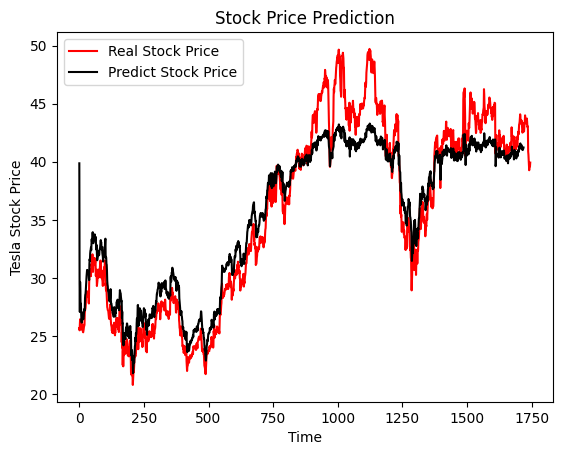

In [43]:
import matplotlib.pyplot as plt
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()